In [1]:
import pandas as pd
import seaborn as sns

In [2]:
subs = pd.read_csv('https://raw.githubusercontent.com/vladkutyanov/pandas_hw/main/pandas_hw/Netflix%20subscription%20fee%20Dec-2021.csv')
currency = pd.read_csv('https://raw.githubusercontent.com/vladkutyanov/pandas_hw/main/pandas_hw/currency.csv')
continents = pd.read_csv('https://raw.githubusercontent.com/vladkutyanov/pandas_hw/main/pandas_hw/continents.csv')
incomes = pd.read_csv('https://raw.githubusercontent.com/vladkutyanov/pandas_hw/main/pandas_hw/incomes.csv')


In [3]:
#Соединяем все данные в одну табличку
df = pd.merge(subs, currency, how = 'left', on = 'Country')
df = pd.merge(df, incomes, how = 'left', on = 'Country')
df = pd.merge(df, continents, how = 'left', on = 'Country')


In [4]:
#Проверим на NaN интересующие столбцы
df[df['Continent'].isnull() == True]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,HK,HKD,HKD,NaN,NaN,NaN,NaN,NaN
53,kr,South Korea,5195,3334,1861,8.07,11.47,14.45,KR,Won,KRW,12507.0,14316.0,44011.0,51305.186,NaN


In [5]:
#Меняем NaN в континенте на Азию, тк оба наблюдения попадают туда
df['Continent'] = df['Continent'].fillna('Asia')

In [6]:
df[df['Currency'].isnull() == True]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent


In [7]:
df[df['meanIncome'].isnull() == True]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent
19,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,GI,Gibraltar Pound,GIP,NaN,NaN,NaN,NaN,Europe
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,HK,HKD,HKD,NaN,NaN,NaN,NaN,Asia
27,id,Indonesia,3887,2449,1438,8.36,10.66,12.96,ID,Indonesian Rupiah,IDR,NaN,NaN,NaN,NaN,Asia
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,LI,Swiss Franc,CHF,NaN,NaN,NaN,NaN,Europe
38,mc,Monaco,5804,3806,1998,9.03,13.54,18.06,MC,Euros,EUR,NaN,NaN,NaN,NaN,Europe
40,nz,New Zealand,6084,4003,2081,8.80,12.53,16.94,NZ,New Zealand Dollars,NZD,NaN,NaN,NaN,NaN,Oceania
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,SM,Euros,EUR,NaN,NaN,NaN,NaN,Europe
50,sg,Singapore,6303,4109,2194,9.51,12.81,16.11,SG,Dollar,SGD,NaN,NaN,NaN,NaN,Asia


Эти наблюдения придется пропустить при анализе с доходами, тк по ним достоверно находятся данные не по доходу, а по ВВП.

In [8]:
#Переименуем колонки
df.rename(columns={'Cost Per Month - Basic ($)': 'CostBasic', 'Cost Per Month - Standard ($)': 'CostStandard', 'Cost Per Month - Premium ($)': 'CostPremium'}, inplace=True)

In [9]:
df

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,Currency,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Peso,ARS,5319.0,6935.0,0.0,45605.826,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Australian Dollars,AUD,17076.0,21329.0,53381.0,25788.215,Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Euros,EUR,18405.0,20718.0,60418.0,9043.070,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Euros,EUR,16157.0,17917.0,56348.0,11632.326,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Boliviano,BOB,3631.0,4787.0,9110.0,11832.940,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,UA,Hryvnia,UAH,4434.0,5010.0,13341.0,43466.819,Europe
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GB,Sterling,GBP,14793.0,18133.0,49931.0,68207.116,Europe
62,us,United States,5818,3826,1992,8.99,13.99,17.99,US,USD,USD,19306.0,25332.0,65297.0,332915.073,North America
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,UY,Peso,UYU,7533.0,9888.0,22515.0,3485.151,South America


**Построить график корреляции между средним доходом (PPP) и ценой подписки**

<AxesSubplot:xlabel='CostBasic', ylabel='meanIncome'>

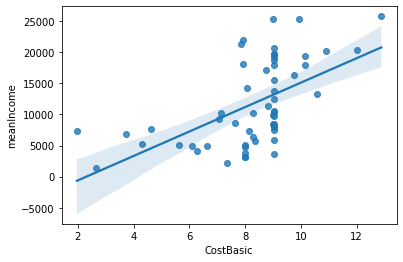

In [12]:
sns.regplot(x=df['CostBasic'], y=df['meanIncome'])

<AxesSubplot:xlabel='CostStandard', ylabel='meanIncome'>

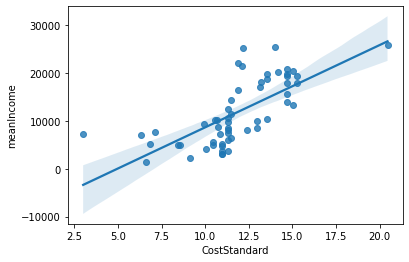

In [13]:
sns.regplot(x=df['CostStandard'], y=df['meanIncome'])

<AxesSubplot:xlabel='CostPremium', ylabel='meanIncome'>

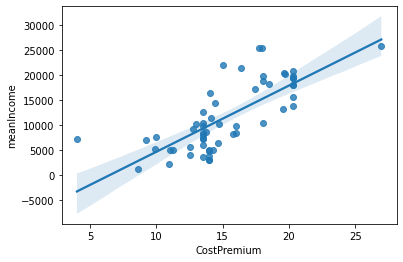

In [14]:
sns.regplot(x=df['CostPremium'], y=df['meanIncome'])

**Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.**

In [15]:
df.groupby(['Currency']).agg({'CostBasic': 'mean', 'CostStandard': 'mean', 'CostPremium': 'mean'})

,CostBasic,CostStandard,CostPremium
Currency,,,
Australian Dollars,7.840000,12.120000,16.390000
Baht,8.340000,10.430000,12.520000
Bolivar,7.990000,10.990000,13.990000
Boliviano,7.990000,10.990000,13.990000
Brazil,4.610000,7.110000,9.960000
Canadian Dollar,7.910000,11.870000,15.030000
Chilean Peso,7.070000,9.910000,12.740000
Costa Rican Colon,8.990000,12.990000,15.990000
Croatian Dinar,9.030000,11.290000,13.540000


**Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента**

In [16]:
df.groupby(['Continent']).agg({'CostBasic': 'mean', 'CostStandard': 'mean', 'CostPremium': 'mean'})

,CostBasic,CostStandard,CostPremium
Continent,,,
Africa,6.260000,10.050000,12.580000
Asia,7.674615,10.437692,13.012308
Europe,9.263636,13.379091,17.666364
North America,8.081667,11.876667,15.205000
Oceania,8.320000,12.325000,16.665000
South America,6.709000,9.619000,12.555000


**Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?**

In [17]:
#Создадим столбцы с отношением подписок к среднему доходу в стране
df['BasicToIncome'] = df.apply(lambda row: 100*12*row.CostBasic/row.meanIncome, axis = 1)
df['StandardToIncome'] = df.apply(lambda row: 100*12*row.CostStandard/row.meanIncome, axis = 1)
df['PremiumToIncome'] = df.apply(lambda row: 100*12*row.CostPremium/row.meanIncome, axis = 1)

In [18]:
df[df['Country'] == 'Czechia']['BasicToIncome']

12    0.929963
Name: BasicToIncome, dtype: float64

In [19]:
df[df['Country'] == 'Czechia']['StandardToIncome']

12    1.210111
Name: StandardToIncome, dtype: float64

In [20]:
df[df['Country'] == 'Czechia']['PremiumToIncome']

12    1.490258
Name: PremiumToIncome, dtype: float64

**Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?**

In [21]:
df.nlargest(5, 'No. of TV Shows')

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,Currency,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent,BasicToIncome,StandardToIncome,PremiumToIncome
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,CZ,Koruna,CZK,10046.0,11394.0,44295.0,10724.555,Europe,0.929963,1.210111,1.490258
51,sk,Slovakia,7035,5055,1980,9.03,11.29,13.54,SK,Koruna,SKK,7991.0,8408.0,33515.0,5460.721,Europe,1.288773,1.611323,1.932445
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54,BG,Lev,BGN,5696.0,7474.0,25312.0,6896.663,Europe,1.449826,1.812684,2.173936
24,hu,Hungary,6884,4802,2082,7.64,10.71,13.78,HU,Forint,HUF,7684.0,8613.0,34966.0,9634.164,Europe,1.064437,1.492163,1.919889
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GB,Sterling,GBP,14793.0,18133.0,49931.0,68207.116,Europe,0.523466,0.873545,1.222964


**Какой процент среднего дохода россиянина будет составлять подписка Netflix?**

In [22]:
df[df['Country'] == 'Russia']['BasicToIncome']

48    1.341031
Name: BasicToIncome, dtype: float64

In [23]:
df[df['Country'] == 'Russia']['StandardToIncome']

48    1.788041
Name: StandardToIncome, dtype: float64

In [24]:
df[df['Country'] == 'Russia']['PremiumToIncome']

48    2.236701
Name: PremiumToIncome, dtype: float64

**На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)**

In [25]:
df.rename(columns={'Total Library Size': 'TotalLibrarySize'}, inplace=True)

In [26]:
df['CPT'] = df.apply(lambda row: row.CostStandard/row.TotalLibrarySize, axis = 1)

In [27]:
df = df.sort_values(by=['CPT'])

In [28]:
df.reset_index(inplace = True)

In [29]:
df[df['Country'] == 'Russia'] #18 место

,index,Country_code,Country,TotalLibrarySize,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,...,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent,BasicToIncome,StandardToIncome,PremiumToIncome,CPT
17,48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,RU,...,RUB,5504.0,7275.0,29181.0,145912.025,Asia,1.341031,1.788041,2.236701,0.001898


**В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?**

In [30]:
df.nsmallest(1, 'CPT') #По CPT - Турция

,index,Country_code,Country,TotalLibrarySize,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,...,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent,BasicToIncome,StandardToIncome,PremiumToIncome,CPT
0,59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,TR,...,TRY,5251.0,7267.0,28133.0,85042.738,Asia,0.325306,0.49539,0.663823,0.000647


In [31]:
df.nsmallest(1, 'CostBasic') #По базовой - Турция

,index,Country_code,Country,TotalLibrarySize,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,...,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent,BasicToIncome,StandardToIncome,PremiumToIncome,CPT
0,59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,TR,...,TRY,5251.0,7267.0,28133.0,85042.738,Asia,0.325306,0.49539,0.663823,0.000647


In [32]:
df.nsmallest(1, 'CostStandard') #По стандартной - Турция

,index,Country_code,Country,TotalLibrarySize,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,...,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent,BasicToIncome,StandardToIncome,PremiumToIncome,CPT
0,59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,TR,...,TRY,5251.0,7267.0,28133.0,85042.738,Asia,0.325306,0.49539,0.663823,0.000647


In [33]:
df.nsmallest(1, 'CostPremium') #Везде побеждает Турция, берем её

,index,Country_code,Country,TotalLibrarySize,No. of TV Shows,No. of Movies,CostBasic,CostStandard,CostPremium,CountryCode,...,Code,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,Continent,BasicToIncome,StandardToIncome,PremiumToIncome,CPT
0,59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,TR,...,TRY,5251.0,7267.0,28133.0,85042.738,Asia,0.325306,0.49539,0.663823,0.000647
